In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
enf = pd.read_csv('encoding_finished_v2.csv')
enf= enf.drop(columns =['Unnamed: 0'], axis=1) #필요없는 컬럼 삭제
enf.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


# 특성(x)과 타겟(y)분리

In [3]:
enf.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Attrition_Flag_Attrited Customer',
       'new_income_category', 'new_edu_category', 'new_card_category'],
      dtype='object')

In [4]:
y = enf['Attrition_Flag_Attrited Customer']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag_Attrited Customer, Length: 10127, dtype: int64

In [5]:
x = enf[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_M',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category']]
x.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,42,1.625,0.061,1,1,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,33,3.714,0.105,0,0,1,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,20,2.333,0.000,1,1,0,0,3,3,0


In [6]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'new_income_category', 'new_edu_category',
       'new_card_category'],
      dtype='object')

# train, test 분리

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x_train.shape, x_test.shape

((7088, 21), (3039, 21))

In [9]:
x_test.shape[0]/(x_train.shape[0]+x_test.shape[0])

0.3000888713340575

# Minmax scaler 적용

In [10]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()
mmscaler.fit(x_train)
mms_x_train = mmscaler.transform(x_train)
mms_x_test = mmscaler.transform(x_test)

In [73]:
print("변환된 후 크기: {}".format(mms_x_train.shape))
#print("스케일 조정 전 특성별 최소값:\n {}".format(x_train.min(axis=0)))
#print("스케일 조정 전 특성별 최대값:\n {}".format(x_train.max(axis=0)))
print("스케일 조정 후 x_train 특성별 최소값:\n {}".format(mms_x_train.min(axis=0)))
print("스케일 조정 후 x_train 특성별 최대값:\n {}".format(mms_x_train.max(axis=0)))
print("스케일 조정 후 x_test 특성별 최소값:\n{}".format(mms_x_test.min(axis=0)))
print("스케일 조정 후 x_test특성별 최대값:\n{}".format(mms_x_test.max(axis=0)))

변환된 후 크기: (7088, 21)
스케일 조정 후 x_train 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
스케일 조정 후 x_train 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
스케일 조정 후 x_test 특성별 최소값:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.00031872 0.         0.00111272 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
스케일 조정 후 x_test특성별 최대값:
[1.11904762 1.         1.         1.         1.         1.
 1.         1.         1.         1.26990654 0.93179036 0.9379845
 0.87506731 0.99499499 1.         1.         1.         1.
 1.         1.         1.        ]


In [74]:
#np.min(x_train), np.max(x_train)

In [75]:
np.min(mms_x_train), np.max(mms_x_train)

(0.0, 1.0000000000000002)

In [76]:
#np.min(x_test), np.max(x_test)

In [77]:
np.min(mms_x_test), np.max(mms_x_test)

(0.0, 1.269906542056075)

# 1. 로지스틱 회귀

In [13]:
from sklearn.linear_model import LogisticRegression

lgr =LogisticRegression()
lgr.fit(mms_x_train, y_train)
lgr_ypred = lgr.predict(mms_x_test)
lgr_yproba = lgr.predict_proba(mms_x_test)

In [14]:
print('             분류 보고서')
print(classification_report(y_test, lgr_ypred))
print('정확도: ',accuracy_score(y_test, lgr_ypred))
print('재현율: ',recall_score(y_test, lgr_ypred))
print('정밀도: ',precision_score(y_test, lgr_ypred))
print('f1점수: ',f1_score(y_test, lgr_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgr_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2543
           1       0.79      0.50      0.61       496

    accuracy                           0.90      3039
   macro avg       0.85      0.74      0.78      3039
weighted avg       0.89      0.90      0.89      3039

정확도:  0.8963474827245804
재현율:  0.49798387096774194
정밀도:  0.7891373801916933
f1점수:  0.6106304079110012
ROC-AUC점수:  0.7360151364276383


# 2.KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(mms_x_train, y_train)
knn_ypred = knn_classifier.predict(mms_x_test)
knn_yproba = knn_classifier.predict_proba(mms_x_test)

In [21]:
print('             분류 보고서')
print(classification_report(y_test, knn_ypred)) 
print('정확도: ',accuracy_score(y_test, knn_ypred))
print('재현율: ',recall_score(y_test, knn_ypred))
print('정밀도: ',precision_score(y_test, knn_ypred))
print('f1점수: ',f1_score(y_test, knn_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, knn_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2543
           1       0.78      0.32      0.45       496

    accuracy                           0.87      3039
   macro avg       0.83      0.65      0.69      3039
weighted avg       0.87      0.87      0.85      3039

정확도:  0.8746298124383021
재현율:  0.32056451612903225
정밀도:  0.7832512315270936
f1점수:  0.4549356223175966
ROC-AUC점수:  0.6516310586936943


In [17]:
import matplotlib.pyplot as plt

k_list = range(1,20)
acc = [] #정확도를 저장할 리스트 초기화

for k in k_list:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(mms_x_train, y_train)
  acc.append(knn_classifier.score(mms_x_test, y_test))#계산된 정확도를 차례로 저장

In [18]:
acc[:10]

[0.8565317538664035,
 0.8716683119447186,
 0.8716683119447186,
 0.870352089503126,
 0.8716683119447186,
 0.8726554787759131,
 0.8736426456071076,
 0.872326423165515,
 0.8746298124383021,
 0.8716683119447186]

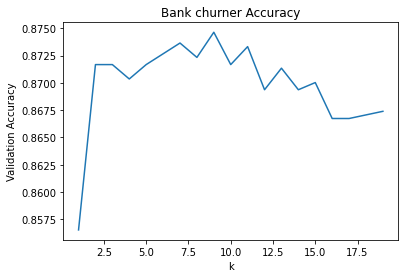

In [19]:
plt.plot(k_list, acc)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Bank churner Accuracy")
plt.show()

# 3.랜덤포레스트

In [22]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=500, max_depth=4,random_state=0) 
rt.fit(mms_x_train, y_train)
rt_ypred=rt.predict(mms_x_test)
rt_yproba=rt.predict_proba(mms_x_test)

In [23]:
print('             분류 보고서')
print(classification_report(y_test, rt_ypred))
print('정확도: ',accuracy_score(y_test, rt_ypred))
print('재현율: ',recall_score(y_test, rt_ypred))
print('정밀도: ',precision_score(y_test, rt_ypred))
print('f1점수: ',f1_score(y_test, rt_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, rt_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2543
           1       0.92      0.44      0.59       496

    accuracy                           0.90      3039
   macro avg       0.91      0.71      0.77      3039
weighted avg       0.90      0.90      0.89      3039

정확도:  0.9012833168805529
재현율:  0.43548387096774194
정밀도:  0.9152542372881356
f1점수:  0.5901639344262295
ROC-AUC점수:  0.7138095721334974


In [24]:
columns = x_train.columns

# 특성 중요도  # columns = iris.feature_names임을 상기하라
feature_importance = pd.DataFrame(rt.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.008492,0.000929,0.002994,0.05579,0.020985,0.023878,0.018141,0.156265,0.009003,0.033299,...,0.209025,0.152486,0.095413,0.008467,0.001067,0.000319,0.000068,0.00054,0.000396,0.000198


In [25]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.209025
Total_Trans_Amt,0.202243
Total_Revolving_Bal,0.156265
Total_Ct_Chng_Q4_Q1,0.152486
Avg_Utilization_Ratio,0.095413


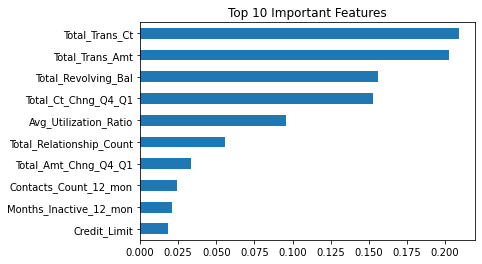

In [26]:
feat_importances = pd.Series(rt.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 4.서포트 벡터 머신

In [27]:
from sklearn.svm import SVC

svc = SVC(C = 1.0, kernel = 'rbf', probability=True)
svc.fit(mms_x_train, y_train)
svc_ypred=svc.predict(mms_x_test)
svc_yproba=svc.predict_proba(mms_x_test)

In [28]:
print('             분류 보고서')
print(classification_report(y_test, svc_ypred))
print('정확도: ',accuracy_score(y_test, svc_ypred))
print('재현율: ',recall_score(y_test, svc_ypred))
print('정밀도: ',precision_score(y_test, svc_ypred))
print('f1점수: ',f1_score(y_test, svc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, svc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2543
           1       0.87      0.54      0.67       496

    accuracy                           0.91      3039
   macro avg       0.89      0.76      0.81      3039
weighted avg       0.91      0.91      0.90      3039

정확도:  0.9124712076340902
재현율:  0.5443548387096774
정밀도:  0.8709677419354839
f1점수:  0.6699751861042184
ROC-AUC점수:  0.7643126926540915


# 5.나이브 베이즈

In [29]:
# 가우시안 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(mms_x_train, y_train)
gnb_ypred=gnb.predict(mms_x_test)
gnb_yproba=gnb.predict_proba(mms_x_test)

In [30]:
print('             분류 보고서')
print(classification_report(y_test, gnb_ypred))
print('정확도: ',accuracy_score(y_test, gnb_ypred))
print('재현율: ',recall_score(y_test, gnb_ypred))
print('정밀도: ',precision_score(y_test, gnb_ypred))
print('f1점수: ',f1_score(y_test, gnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2543
           1       0.62      0.62      0.62       496

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039

정확도:  0.876604146100691
재현율:  0.6209677419354839
정밀도:  0.6222222222222222
f1점수:  0.6215943491422804
ROC-AUC점수:  0.7737162736417491


In [31]:
# 다항분포 나이브 베이즈
from sklearn.naive_bayes import MultinomialNB

Mnb = MultinomialNB()
Mnb.fit(mms_x_train, y_train)
mnb_ypred=Mnb.predict(mms_x_test)
mnb_yproba=Mnb.predict_proba(mms_x_test)

In [32]:
print('             분류 보고서')
print(classification_report(y_test, mnb_ypred))
print('정확도: ',accuracy_score(y_test, mnb_ypred))
print('재현율: ',recall_score(y_test, mnb_ypred))
print('정밀도: ',precision_score(y_test, mnb_ypred))
print('f1점수: ',f1_score(y_test, mnb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mnb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

정확도:  0.836788417242514
재현율:  0.0
정밀도:  0.0
f1점수:  0.0
ROC-AUC점수:  0.5


# 6.신경망 MLP 분류

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = (4, 4), learning_rate_init = 0.1)
mlp.fit(mms_x_train, y_train)
mlp_ypred = mlp.predict(mms_x_test)
mlp_yproba=mlp.predict_proba(mms_x_test)

In [34]:
print('             분류 보고서')
print(classification_report(y_test, mlp_ypred))
print('정확도: ',accuracy_score(y_test, mlp_ypred))
print('재현율: ',recall_score(y_test, mlp_ypred))
print('정밀도: ',precision_score(y_test, mlp_ypred))
print('f1점수: ',f1_score(y_test, mlp_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, mlp_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2543
           1       0.87      0.57      0.69       496

    accuracy                           0.92      3039
   macro avg       0.90      0.78      0.82      3039
weighted avg       0.91      0.92      0.91      3039

정확도:  0.9157617637380717
재현율:  0.5665322580645161
정밀도:  0.8726708074534162
f1점수:  0.6870415647921759
ROC-AUC점수:  0.7752047841639922


# 7.Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0,learning_rate=0.5)
gbc.fit(mms_x_train,y_train)
gbc_ypred=gbc.predict(mms_x_test)
gbc_yproba=gbc.predict_proba(mms_x_test)

In [36]:
print('             분류 보고서')
print(classification_report(y_test,gbc_ypred))
print('정확도: ',accuracy_score(y_test, gbc_ypred))
print('재현율: ',recall_score(y_test, gbc_ypred))
print('정밀도: ',precision_score(y_test, gbc_ypred))
print('f1점수: ',f1_score(y_test, gbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, gbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2543
           1       0.92      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9693978282329714
재현율:  0.8870967741935484
정밀도:  0.9224318658280922
f1점수:  0.9044193216855086
ROC-AUC점수:  0.9362735148985831


In [37]:
columns = x_train.columns

feature_importance = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.0184,0.000717,0.002717,0.079492,0.010013,0.016839,0.003539,0.189779,0.009805,0.036065,...,0.346777,0.082224,0.003819,0.000747,0.00182,0.00005,0.000189,0.000549,0.001734,0.0


In [38]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


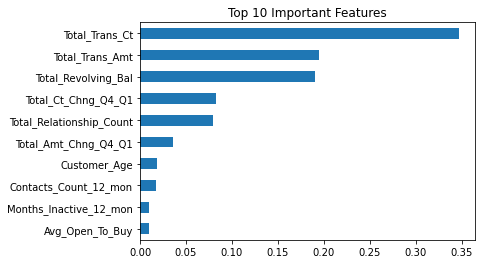

In [39]:
feat_importances = pd.Series(gbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 8.XGBoost classifier

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=1.0, max_depth =4)
xgb.fit(mms_x_train, y_train)
xgb_ypred = xgb.predict(mms_x_test)
xgb_yproba = xgb.predict_proba(mms_x_test)

[11:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
print('             분류 보고서')
print(classification_report(y_test, xgb_ypred))
print('정확도: ',accuracy_score(y_test, xgb_ypred)) 
print('재현율: ',recall_score(y_test,  xgb_ypred))
print('정밀도: ',precision_score(y_test,  xgb_ypred))
print('f1점수: ',f1_score(y_test,  xgb_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, xgb_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.89      0.89      0.89       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9651201052977953
재현율:  0.8931451612903226
정밀도:  0.8931451612903226
f1점수:  0.8931451612903226
ROC-AUC점수:  0.9361518177666713


In [42]:
columns = x_train.columns

feature_importance = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,0.034004,0.011509,0.014365,0.146423,0.07735,0.05099,0.019263,0.146235,0.010699,0.034397,...,0.22117,0.055214,0.009926,0.019697,0.015639,0.005338,0.02236,0.00899,0.010633,0.007575


In [43]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


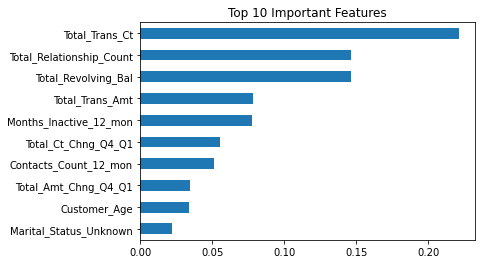

In [44]:
feat_importances = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 9.LightGBM

In [45]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(mms_x_train, y_train)
lgbm_ypred = lgbm.predict(mms_x_test)
lgbm_yproba = lgbm.predict_proba(mms_x_test)

In [46]:
print('             분류 보고서')
print(classification_report(y_test, lgbm_ypred))
print('정확도: ',accuracy_score(y_test, lgbm_ypred)) 
print('재현율: ',recall_score(y_test,  lgbm_ypred))
print('정밀도: ',precision_score(y_test,  lgbm_ypred))
print('f1점수: ',f1_score(y_test,  lgbm_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, lgbm_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.90      0.90      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9674234945705824
재현율:  0.8971774193548387
정밀도:  0.9026369168356998
f1점수:  0.8998988877654196
ROC-AUC점수:  0.9391510376365229


In [47]:
columns = x_train.columns
feature_importance = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,818,183,618,542,348,354,632,704,520,1524,...,1196,1057,335,127,134,90,41,180,241,23


In [48]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Amt,2333
Total_Amt_Chng_Q4_Q1,1524
Total_Trans_Ct,1196
Total_Ct_Chng_Q4_Q1,1057
Customer_Age,818


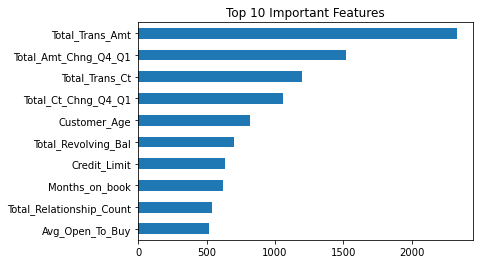

In [49]:
feat_importances = pd.Series(lgbm.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 10.catboost

In [50]:
from catboost import CatBoostClassifier, Pool

cbc = CatBoostClassifier()
cbc.fit(mms_x_train, y_train)
cbc_ypred = cbc.predict(mms_x_test)
cbc_yproba = cbc.predict_proba(mms_x_test)

Learning rate set to 0.023774
0:	learn: 0.6593964	total: 145ms	remaining: 2m 25s
1:	learn: 0.6310265	total: 154ms	remaining: 1m 16s
2:	learn: 0.6030996	total: 162ms	remaining: 53.8s
3:	learn: 0.5760449	total: 169ms	remaining: 42.2s
4:	learn: 0.5514639	total: 176ms	remaining: 35s
5:	learn: 0.5308499	total: 185ms	remaining: 30.6s
6:	learn: 0.5097667	total: 194ms	remaining: 27.5s
7:	learn: 0.4904607	total: 202ms	remaining: 25.1s
8:	learn: 0.4717865	total: 212ms	remaining: 23.3s
9:	learn: 0.4561123	total: 219ms	remaining: 21.7s
10:	learn: 0.4404298	total: 239ms	remaining: 21.5s
11:	learn: 0.4258466	total: 255ms	remaining: 21s
12:	learn: 0.4129611	total: 268ms	remaining: 20.3s
13:	learn: 0.3987729	total: 276ms	remaining: 19.4s
14:	learn: 0.3884618	total: 283ms	remaining: 18.6s
15:	learn: 0.3764435	total: 295ms	remaining: 18.2s
16:	learn: 0.3661287	total: 303ms	remaining: 17.5s
17:	learn: 0.3512598	total: 311ms	remaining: 17s
18:	learn: 0.3460445	total: 321ms	remaining: 16.6s
19:	learn: 0.33

166:	learn: 0.1016004	total: 1.77s	remaining: 8.83s
167:	learn: 0.1011724	total: 1.78s	remaining: 8.83s
168:	learn: 0.1007055	total: 1.79s	remaining: 8.8s
169:	learn: 0.1001548	total: 1.8s	remaining: 8.79s
170:	learn: 0.0999839	total: 1.81s	remaining: 8.76s
171:	learn: 0.0996465	total: 1.81s	remaining: 8.73s
172:	learn: 0.0992939	total: 1.82s	remaining: 8.7s
173:	learn: 0.0987212	total: 1.83s	remaining: 8.67s
174:	learn: 0.0985235	total: 1.83s	remaining: 8.65s
175:	learn: 0.0983303	total: 1.85s	remaining: 8.65s
176:	learn: 0.0980891	total: 1.85s	remaining: 8.63s
177:	learn: 0.0977123	total: 1.86s	remaining: 8.6s
178:	learn: 0.0973905	total: 1.87s	remaining: 8.57s
179:	learn: 0.0969536	total: 1.88s	remaining: 8.55s
180:	learn: 0.0963983	total: 1.89s	remaining: 8.54s
181:	learn: 0.0961493	total: 1.89s	remaining: 8.51s
182:	learn: 0.0959197	total: 1.9s	remaining: 8.49s
183:	learn: 0.0956470	total: 1.91s	remaining: 8.46s
184:	learn: 0.0953859	total: 1.91s	remaining: 8.44s
185:	learn: 0.094

335:	learn: 0.0657075	total: 2.96s	remaining: 5.86s
336:	learn: 0.0655430	total: 2.97s	remaining: 5.85s
337:	learn: 0.0654232	total: 2.98s	remaining: 5.84s
338:	learn: 0.0652633	total: 2.99s	remaining: 5.83s
339:	learn: 0.0651156	total: 3s	remaining: 5.82s
340:	learn: 0.0649426	total: 3s	remaining: 5.8s
341:	learn: 0.0648114	total: 3.01s	remaining: 5.79s
342:	learn: 0.0646487	total: 3.01s	remaining: 5.77s
343:	learn: 0.0645377	total: 3.02s	remaining: 5.76s
344:	learn: 0.0644438	total: 3.03s	remaining: 5.75s
345:	learn: 0.0642929	total: 3.03s	remaining: 5.73s
346:	learn: 0.0641396	total: 3.04s	remaining: 5.72s
347:	learn: 0.0639583	total: 3.04s	remaining: 5.7s
348:	learn: 0.0638952	total: 3.05s	remaining: 5.69s
349:	learn: 0.0637569	total: 3.05s	remaining: 5.67s
350:	learn: 0.0636580	total: 3.06s	remaining: 5.66s
351:	learn: 0.0635802	total: 3.07s	remaining: 5.64s
352:	learn: 0.0634825	total: 3.07s	remaining: 5.63s
353:	learn: 0.0633440	total: 3.08s	remaining: 5.62s
354:	learn: 0.063213

504:	learn: 0.0480157	total: 4s	remaining: 3.92s
505:	learn: 0.0479236	total: 4.01s	remaining: 3.91s
506:	learn: 0.0478365	total: 4.01s	remaining: 3.9s
507:	learn: 0.0477906	total: 4.02s	remaining: 3.89s
508:	learn: 0.0477262	total: 4.03s	remaining: 3.88s
509:	learn: 0.0476305	total: 4.03s	remaining: 3.88s
510:	learn: 0.0476063	total: 4.04s	remaining: 3.87s
511:	learn: 0.0475625	total: 4.04s	remaining: 3.85s
512:	learn: 0.0474535	total: 4.05s	remaining: 3.85s
513:	learn: 0.0473767	total: 4.06s	remaining: 3.84s
514:	learn: 0.0472665	total: 4.06s	remaining: 3.83s
515:	learn: 0.0471576	total: 4.07s	remaining: 3.82s
516:	learn: 0.0470652	total: 4.08s	remaining: 3.81s
517:	learn: 0.0469500	total: 4.08s	remaining: 3.8s
518:	learn: 0.0468919	total: 4.09s	remaining: 3.79s
519:	learn: 0.0467893	total: 4.09s	remaining: 3.78s
520:	learn: 0.0467002	total: 4.1s	remaining: 3.77s
521:	learn: 0.0466580	total: 4.11s	remaining: 3.76s
522:	learn: 0.0465782	total: 4.11s	remaining: 3.75s
523:	learn: 0.0464

678:	learn: 0.0367700	total: 5.03s	remaining: 2.38s
679:	learn: 0.0367413	total: 5.04s	remaining: 2.37s
680:	learn: 0.0366828	total: 5.05s	remaining: 2.37s
681:	learn: 0.0366536	total: 5.06s	remaining: 2.36s
682:	learn: 0.0365851	total: 5.06s	remaining: 2.35s
683:	learn: 0.0365176	total: 5.07s	remaining: 2.34s
684:	learn: 0.0364739	total: 5.08s	remaining: 2.33s
685:	learn: 0.0364097	total: 5.08s	remaining: 2.33s
686:	learn: 0.0363485	total: 5.09s	remaining: 2.32s
687:	learn: 0.0363106	total: 5.09s	remaining: 2.31s
688:	learn: 0.0362782	total: 5.1s	remaining: 2.3s
689:	learn: 0.0362232	total: 5.1s	remaining: 2.29s
690:	learn: 0.0361560	total: 5.11s	remaining: 2.29s
691:	learn: 0.0361000	total: 5.12s	remaining: 2.28s
692:	learn: 0.0360358	total: 5.12s	remaining: 2.27s
693:	learn: 0.0359957	total: 5.13s	remaining: 2.26s
694:	learn: 0.0359322	total: 5.13s	remaining: 2.25s
695:	learn: 0.0358743	total: 5.14s	remaining: 2.24s
696:	learn: 0.0358085	total: 5.14s	remaining: 2.23s
697:	learn: 0.0

857:	learn: 0.0288493	total: 6.07s	remaining: 1s
858:	learn: 0.0288067	total: 6.08s	remaining: 998ms
859:	learn: 0.0287524	total: 6.09s	remaining: 991ms
860:	learn: 0.0286882	total: 6.1s	remaining: 984ms
861:	learn: 0.0286668	total: 6.1s	remaining: 977ms
862:	learn: 0.0286249	total: 6.11s	remaining: 970ms
863:	learn: 0.0285488	total: 6.12s	remaining: 963ms
864:	learn: 0.0285176	total: 6.12s	remaining: 956ms
865:	learn: 0.0284752	total: 6.13s	remaining: 948ms
866:	learn: 0.0284546	total: 6.13s	remaining: 941ms
867:	learn: 0.0284126	total: 6.14s	remaining: 934ms
868:	learn: 0.0283793	total: 6.14s	remaining: 926ms
869:	learn: 0.0283533	total: 6.15s	remaining: 919ms
870:	learn: 0.0283153	total: 6.16s	remaining: 912ms
871:	learn: 0.0282843	total: 6.16s	remaining: 904ms
872:	learn: 0.0282349	total: 6.17s	remaining: 897ms
873:	learn: 0.0282239	total: 6.17s	remaining: 890ms
874:	learn: 0.0282101	total: 6.18s	remaining: 883ms
875:	learn: 0.0281897	total: 6.18s	remaining: 875ms
876:	learn: 0.028

In [51]:
print('             분류 보고서')
print(classification_report(y_test, cbc_ypred))
print('정확도: ',accuracy_score(y_test, cbc_ypred)) 
print('재현율: ',recall_score(y_test,  cbc_ypred))
print('정밀도: ',precision_score(y_test,  cbc_ypred))
print('f1점수: ',f1_score(y_test,  cbc_ypred))
print('ROC-AUC점수: ',roc_auc_score(y_test, cbc_ypred))

             분류 보고서
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2543
           1       0.91      0.90      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

정확도:  0.9684106614017769
재현율:  0.8951612903225806
정밀도:  0.9098360655737705
f1점수:  0.9024390243902438
ROC-AUC점수:  0.9389294457904683


In [52]:
columns = x_train.columns
feature_importance = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=columns, index=['feature_importance'])
feature_importance

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,new_income_category,new_edu_category,new_card_category
feature_importance,3.17889,0.418323,1.497357,4.820217,2.903648,1.870492,4.445777,5.849693,1.567708,7.441033,...,28.987037,5.491216,1.752732,0.788604,0.719793,0.165848,0.105384,0.196667,0.398696,0.0672


In [53]:
feature_importance.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()

,feature_importance
Total_Trans_Ct,28.987037
Total_Trans_Amt,27.333687
Total_Amt_Chng_Q4_Q1,7.441033
Total_Revolving_Bal,5.849693
Total_Ct_Chng_Q4_Q1,5.491216


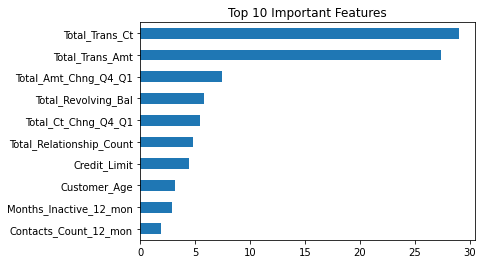

In [54]:
feat_importances = pd.Series(cbc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 각 모델별 점수 비교

In [55]:
Comparison = pd.DataFrame({'LogReg':[accuracy_score(y_test, lgr_ypred),recall_score(y_test,  lgr_ypred),precision_score(y_test,  lgr_ypred),f1_score(y_test,  lgr_ypred),roc_auc_score(y_test, lgr_ypred)],
'KNN':[accuracy_score(y_test, knn_ypred),recall_score(y_test,  knn_ypred),precision_score(y_test,  knn_ypred),f1_score(y_test,  knn_ypred),roc_auc_score(y_test, knn_ypred)],
'RandFor':[accuracy_score(y_test, rt_ypred),recall_score(y_test,  rt_ypred),precision_score(y_test,  rt_ypred),f1_score(y_test,  rt_ypred),roc_auc_score(y_test, rt_ypred)],    
'SVM':[accuracy_score(y_test, svc_ypred),recall_score(y_test,  svc_ypred),precision_score(y_test,  svc_ypred),f1_score(y_test,  svc_ypred),roc_auc_score(y_test, svc_ypred)],
'GNB':[accuracy_score(y_test, gnb_ypred),recall_score(y_test,  gnb_ypred),precision_score(y_test,  gnb_ypred),f1_score(y_test,  gnb_ypred),roc_auc_score(y_test, gnb_ypred)],
"MNB":[accuracy_score(y_test, mnb_ypred),recall_score(y_test,  mnb_ypred),precision_score(y_test,  mnb_ypred),f1_score(y_test,  mnb_ypred),roc_auc_score(y_test, mnb_ypred)],
"MLP":[accuracy_score(y_test, mlp_ypred),recall_score(y_test,  mlp_ypred),precision_score(y_test,  mlp_ypred),f1_score(y_test,  mlp_ypred),roc_auc_score(y_test, mlp_ypred)],
"GradBoost":[accuracy_score(y_test, gbc_ypred),recall_score(y_test,  gbc_ypred),precision_score(y_test,  gbc_ypred),f1_score(y_test,  gbc_ypred),roc_auc_score(y_test, gbc_ypred)],
"XGBoost":[accuracy_score(y_test, xgb_ypred),recall_score(y_test,  xgb_ypred),precision_score(y_test,  xgb_ypred),f1_score(y_test,  xgb_ypred),roc_auc_score(y_test, xgb_ypred)],
"LightGBM":[accuracy_score(y_test, lgbm_ypred),recall_score(y_test,  lgbm_ypred),precision_score(y_test,  lgbm_ypred),f1_score(y_test,  lgbm_ypred),roc_auc_score(y_test, lgbm_ypred)],
'CatBoost':[accuracy_score(y_test, cbc_ypred),recall_score(y_test,  cbc_ypred),precision_score(y_test,  cbc_ypred),f1_score(y_test,  cbc_ypred),roc_auc_score(y_test, cbc_ypred)]},
                          index = ['ACC', 'Recall', 'Precision', 'F1', 'ROC-AUC'])
Comparison

,LogReg,KNN,RandFor,SVM,GNB,MNB,MLP,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.896347,0.874630,0.901283,0.912471,0.876604,0.836788,0.915762,0.969398,0.965120,0.967423,0.968411
Recall,0.497984,0.320565,0.435484,0.544355,0.620968,0.000000,0.566532,0.887097,0.893145,0.897177,0.895161
Precision,0.789137,0.783251,0.915254,0.870968,0.622222,0.000000,0.872671,0.922432,0.893145,0.902637,0.909836
F1,0.610630,0.454936,0.590164,0.669975,0.621594,0.000000,0.687042,0.904419,0.893145,0.899899,0.902439
ROC-AUC,0.736015,0.651631,0.713810,0.764313,0.773716,0.500000,0.775205,0.936274,0.936152,0.939151,0.938929


In [56]:
Comparison.max(axis=1)

ACC          0.969398
Recall       0.897177
Precision    0.922432
F1           0.904419
ROC-AUC      0.939151
dtype: float64

In [57]:
result = Comparison.max(axis=1)
result.index = Comparison.idxmax(axis=1)
result.index

Index(['GradBoost', 'LightGBM', 'GradBoost', 'GradBoost', 'LightGBM'], dtype='object')

In [58]:
top4 = Comparison[['GradBoost', 'XGBoost', 'LightGBM', 'CatBoost']]
top4

,GradBoost,XGBoost,LightGBM,CatBoost
ACC,0.969398,0.965120,0.967423,0.968411
Recall,0.887097,0.893145,0.897177,0.895161
Precision,0.922432,0.893145,0.902637,0.909836
F1,0.904419,0.893145,0.899899,0.902439
ROC-AUC,0.936274,0.936152,0.939151,0.938929


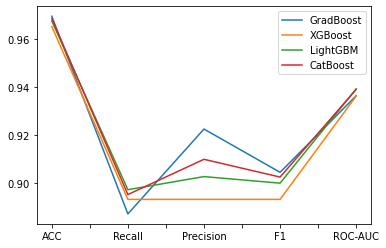

In [59]:
top4.plot()
plt.show()

# Top4 모델별 Feature importance 비교

In [60]:
# Gradient Boosting Classifier
grad_df = pd.DataFrame(gbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
grad_dft = grad_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
grad_dft

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492


In [61]:
# XGbBoost
xgboost_df = pd.DataFrame(xgb.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
xgboost_dft = xgboost_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
xgboost_dft

,feature_importance
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


In [62]:
# LightGBM
lightgbm_df = pd.DataFrame(lgbm.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
lightgbm_dft = lightgbm_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
lightgbm_dft

,feature_importance
Total_Trans_Amt,2333
Total_Amt_Chng_Q4_Q1,1524
Total_Trans_Ct,1196
Total_Ct_Chng_Q4_Q1,1057
Customer_Age,818


In [63]:
# CatBoost
cat_df = pd.DataFrame(cbc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
cat_dft = cat_df.T.sort_values(by=['feature_importance'], axis=0, ascending=False).head()
cat_dft

,feature_importance
Total_Trans_Ct,28.987037
Total_Trans_Amt,27.333687
Total_Amt_Chng_Q4_Q1,7.441033
Total_Revolving_Bal,5.849693
Total_Ct_Chng_Q4_Q1,5.491216


In [64]:
freq = pd.concat([grad_dft, xgboost_dft, lightgbm_dft, cat_dft])
freq

,feature_importance
Total_Trans_Ct,0.346777
Total_Trans_Amt,0.194725
Total_Revolving_Bal,0.189779
Total_Ct_Chng_Q4_Q1,0.082224
Total_Relationship_Count,0.079492
Total_Trans_Ct,0.221170
Total_Relationship_Count,0.146423
Total_Revolving_Bal,0.146235
Total_Trans_Amt,0.078223
Months_Inactive_12_mon,0.077350


In [65]:
# 가장 빈도수가 높은 특성
result = freq.max(axis=0)
result.index = freq.idxmax(axis=0)
result.index

Index(['Total_Trans_Amt'], dtype='object')